In [22]:
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
import re
import spacy
from underthesea import word_tokenize, pos_tag
from nltk.corpus import stopwords
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
nlp = spacy.load('en_core_web_md')
stop_words = set(stopwords.words('english'))

In [3]:
csv_cr = "../data/raw/UpdatedResumeDataSet.csv"

In [4]:
df = pd.read_csv(csv_cr)

In [5]:
pd.DataFrame(df)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
list_job_to_remove = ['Sales','Health and fitness','PMO','Arts']

df = df[~df['Category'].isin(list_job_to_remove)]

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Web Designing',
       'Mechanical Engineer', 'Civil Engineer', 'Java Developer',
       'Business Analyst', 'SAP Developer', 'Automation Testing',
       'Electrical Engineering', 'Operations Manager', 'Python Developer',
       'DevOps Engineer', 'Network Security Engineer', 'Database',
       'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain',
       'Testing'], dtype=object)

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|#\S+|@\S+|[^\w\s]|[\*\•\n]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return ' '.join(tokens)

In [10]:
df['resume_cleaned'] = df['Resume'].apply(clean_text)

In [11]:
pd.DataFrame(df)

,Category,Resume,resume_cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python pandas numpy...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â r â python â sap hana â tableau â sap ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill â proficient ms office word bas...
958,Testing,â Willingness to accept the challenges. â ...,â willingness accept challenge â positive thin...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill â quick learner â eagerness lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge ms power poi...


In [12]:

def read_skills(file_path):
    skills = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith('#'):
                skills.append(line.lower())
    return skills
def extract_primary_skills(text):
    # Xử lý trường hợp text không phải chuỗi
    if not isinstance(text, str) or pd.isna(text):
        return []
    return [skill for skill in primary_skills if skill in text.lower()]

def extract_secondary_skills(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    return [skill for skill in secondary_skills if skill in text.lower()]

def extract_adjectives(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    doc = nlp(text)
    return list(set([token.text for token in doc if token.pos_ == 'ADJ']))

def extract_adverbs(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    doc = nlp(text)
    return list(set([token.text for token in doc if token.pos_ == 'ADV']))


In [27]:
primary_skills = read_skills('../data/primary_skills.txt')
secondary_skills = read_skills('../data/secondary_skills.txt')

In [28]:
df['primary_skills'] = df['resume_cleaned'].apply(extract_primary_skills)
df['secondary_skills'] = df['resume_cleaned'].apply(extract_secondary_skills)
df['adjectives'] = df['resume_cleaned'].apply(extract_adjectives)
df['adverbs'] = df['resume_cleaned'].apply(extract_adverbs)

C:\Users\ACER ASPIRE\AppData\Local\Temp\ipykernel_7524\1403453381.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')


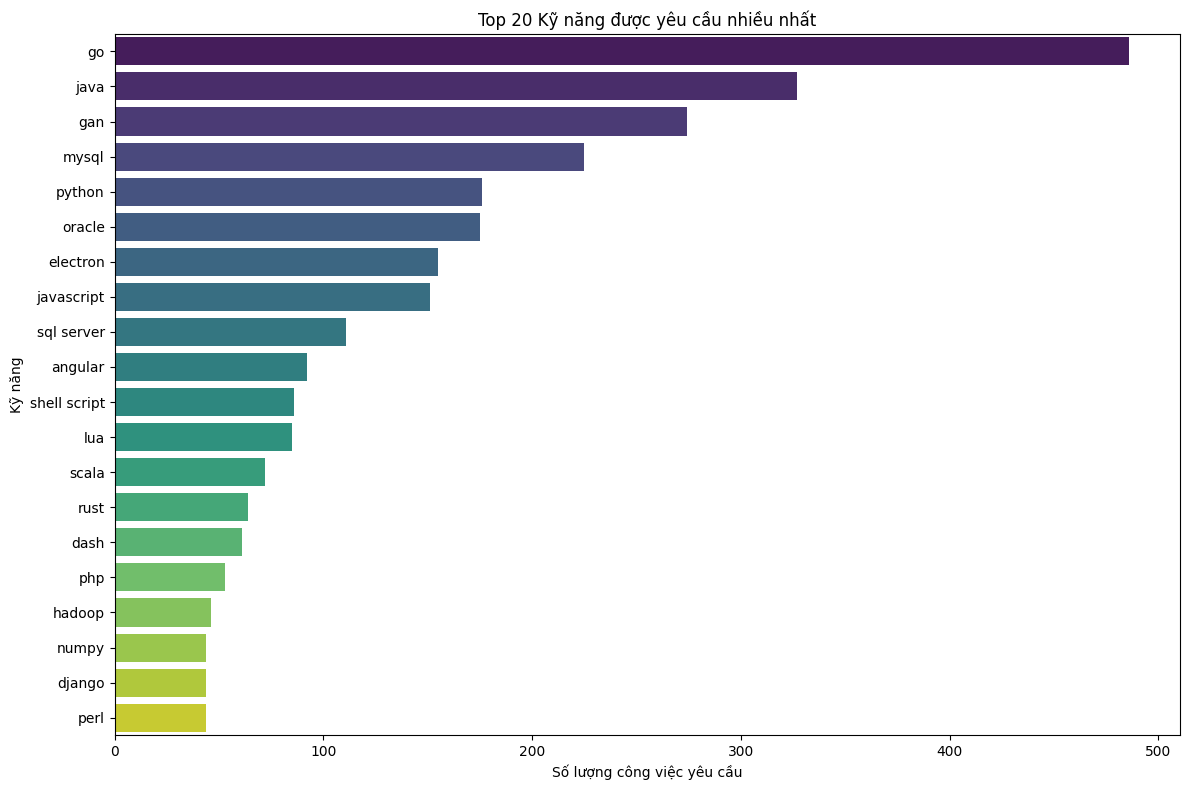

In [ ]:
skills_series = df['primary_skills'].explode().dropna().str.strip()

# Đếm kỹ năng phổ biến nhất
skill_counts = Counter(skills_series)
top_skills = skill_counts.most_common(20)

# Chuyển thành DataFrame để vẽ biểu đồ
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
plt.title('Top 20 Kỹ năng được yêu cầu nhiều nhất')
plt.xlabel('Số lượng công việc yêu cầu')
plt.ylabel('Kỹ năng')
plt.tight_layout()
plt.show()

In [31]:
for i in range(len(df)):
    df.at[i, 'id'] = "CANDIDATE_" + str(i)

In [32]:
pd.DataFrame(df)

,Category,Resume,resume_cleaned,primary_skills,secondary_skills,adjectives,adverbs,id
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python pandas numpy...,"[python, java, javascript, go, angular, flask,...","[git, docker, elasticsearch, logstash, kibana,...","[neural, negative, blob, predictive, meta, ran...","[plotly, well, also, personally, frequently]",CANDIDATE_0
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,"[python, keras, machine learning]","[git, github]","[encode, mixed, less, 5th, dummy, koramangala,...",[mainly],CANDIDATE_1
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,"[python, java, go, matlab, bash, django, flask...","[git, github, linux, ubuntu, debian, pycharm, ...","[deep, mathematic, little, current, hindustan,...","[basically, henceforth, currently, much, back]",CANDIDATE_2
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â r â python â sap hana â tableau â sap ...,"[python, go, swift, electron, sql server, lstm...","[git, windows server, visual studio, segment]","[enable, apart, predictive, analytic, present,...","[deep, individually, manually, fast, also, act...",CANDIDATE_3
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[python, java]",[],[less],[],CANDIDATE_4
...,...,...,...,...,...,...,...,...
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CANDIDATE_704
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CANDIDATE_705
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CANDIDATE_706
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CANDIDATE_707


In [38]:
df.dropna(inplace=True)
df.to_csv('../data/clean/clean_resumes_v2.csv', index=False, encoding='utf-8')

C:\Users\ACER ASPIRE\AppData\Local\Temp\ipykernel_7524\3871042410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=category_counts, palette='viridis')


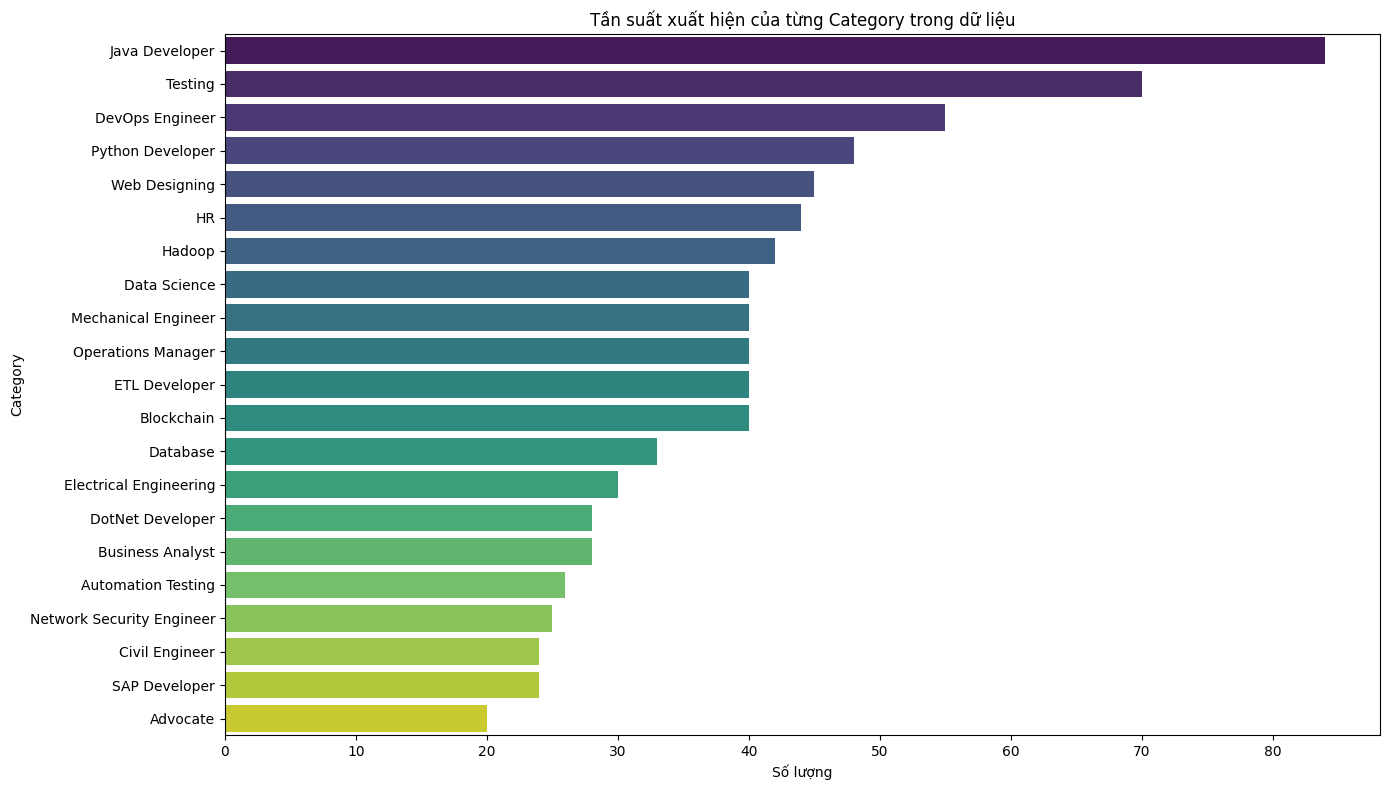